In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [7]:
data = pd.read_csv('House Price.csv')
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [8]:
data.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [10]:
data.shape

(1000, 8)

In [11]:
class LinearRegression:
    def __init__(self, alpha=0.01, num_iter=1000):
        self.alpha = alpha
        self.num_iter = num_iter
        self.theta = None

    def predict(self, X):
        m = len(X)
        predictions = []
        for i in range(m):
            h = 0
            for j in range(len(self.theta)):
                h += X[i][j] * self.theta[j]
            predictions.append(h)
        return predictions

    def cost(self, X, y):
        m = len(y)
        total_cost = 0
        predictions = self.predict(X)
        for i in range(m):
            total_cost += (predictions[i] - y[i]) ** 2
        return total_cost / (2 * m)

    def gradient_descent(self, X, y):
        m = len(y)
        n = len(X[0])
        self.theta = [0] * n
        for _ in range(self.num_iter):
            predictions = self.predict(X)
            for j in range(n):
                gradient = 0
                for i in range(m):
                    gradient += (predictions[i] - y[i]) * X[i][j]
                gradient /= m
                self.theta[j] -= self.alpha * gradient
        return self.theta

    def mean_absolute_error(self, y_pred, y_true):
        m = len(y_true)
        total_error = 0
        for i in range(m):
            error = y_pred[i] - y_true[i]
            if error < 0:
                error = -error
            total_error += error
        return total_error / m

    def mean_squared_error(self, y_pred, y_true):
        m = len(y_true)
        total_error = 0
        for i in range(m):
            total_error += (y_pred[i] - y_true[i]) ** 2
        return total_error / m

    def r2_score(self, y_pred, y_true):
        m = len(y_true)
        mean_y = 0
        for i in range(m):
            mean_y += y_true[i]
        mean_y /= m

        ss_tot = 0
        ss_res = 0
        for i in range(m):
            ss_tot += (y_true[i] - mean_y) ** 2
            ss_res += (y_true[i] - y_pred[i]) ** 2

        return 1 - (ss_res / ss_tot)

    def adjusted_r2_score(self, y_pred, y_true, n, k):
        r2 = self.r2_score(y_pred, y_true)
        return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [15]:
# Example usage:
train_data = data.loc[:801, :]
X_train = train_data.drop(["House_Price"], axis=1).values
y_train = train_data["House_Price"].values

test_data = data.loc[801:, :]
X_test = test_data.drop(["House_Price"], axis=1).values
y_test = test_data["House_Price"].values

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model initialization and training
model = LinearRegression(alpha=0.01, num_iter=1000)
theta = model.gradient_descent(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics calculation
mae = model.mean_absolute_error(y_pred, y_test)
mse = model.mean_squared_error(y_pred, y_test)
r2 = model.r2_score(y_pred, y_test)
adjusted_r2 = model.adjusted_r2_score(y_pred, y_test, n=len(y_test), k=X_test.shape[1])

# Results
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("Adjusted R2 Score:", adjusted_r2)

MAE: 81182.34025860553
MSE: 9907661992.57754
R2 Score: 0.8385171993455189
Adjusted R2 Score: 0.8325989815204856


# Plots

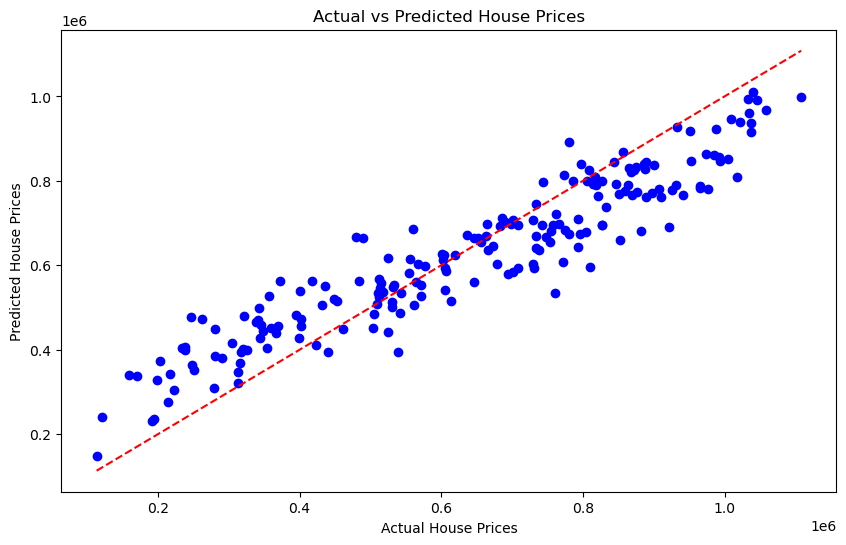

In [16]:
# 1. Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect predictions
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

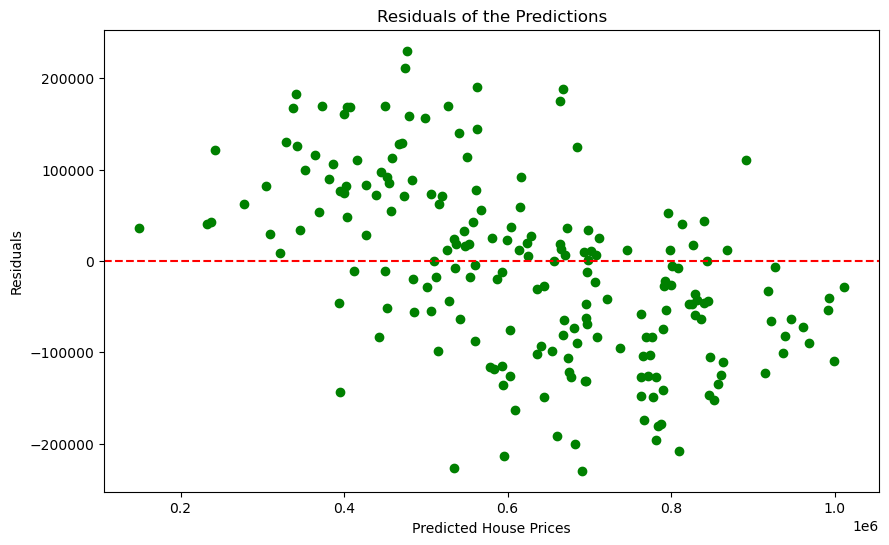

In [17]:
# 2. Plot Residuals (errors)
residuals = y_pred - y_test

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel('Predicted House Prices')
plt.ylabel('Residuals')
plt.title('Residuals of the Predictions')
plt.show()